# Importing the varbiles

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from IPython.display import display

# Importing the data 

In [45]:
heathdata_df = pd.read_csv('/Users/tamanikaid/Desktop/My documents /Data Analytics Course /Project-4-Data-Doctors/Resources/postgres.csv')
heathdata_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


The data above have already been cleaned by shola(team mate) by droping ID and droping any NA

In [46]:
#data info 
heathdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 421.9+ KB


In [47]:
#sum
heathdata_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [48]:
#shape
heathdata_df.shape

(4908, 11)

In [49]:
#unique
heathdata_df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3851
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [50]:
#describe 
heathdata_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


0    4699
1     209
Name: stroke, dtype: int64

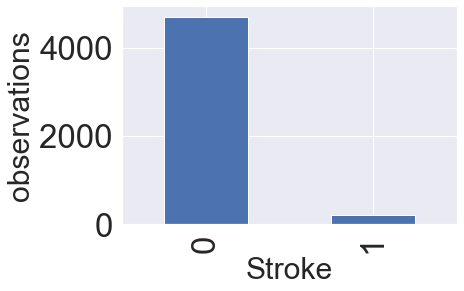

In [88]:
heathdata_df['stroke'].value_counts().plot(kind='bar')
plt.ylabel("observations", fontsize = 30)
plt.xlabel('Stroke', fontsize = 30)
heathdata_df.stroke.value_counts()

by looking at the data above the data is not balanced.

# Convert categorical data to numeric with `pd.get_dummies`

In [89]:
heathdata_df = pd.get_dummies(heathdata_df,dtype=float)
heathdata_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [90]:
heathdata_df.sum()

age                               210400.12
hypertension                         451.00
heart_disease                        243.00
avg_glucose_level                 516799.65
bmi                               141814.50
stroke                               209.00
gender_Female                       2897.00
gender_Male                         2011.00
ever_married_No                     1704.00
ever_married_Yes                    3204.00
work_type_Govt_job                   630.00
work_type_Never_worked                22.00
work_type_Private                   2810.00
work_type_Self-employed              775.00
work_type_children                   671.00
Residence_type_Rural                2418.00
Residence_type_Urban                2490.00
smoking_status_Unknown              1483.00
smoking_status_formerly smoked       836.00
smoking_status_never smoked         1852.00
smoking_status_smokes                737.00
dtype: float64

# Plotting each columues

# HeatMap

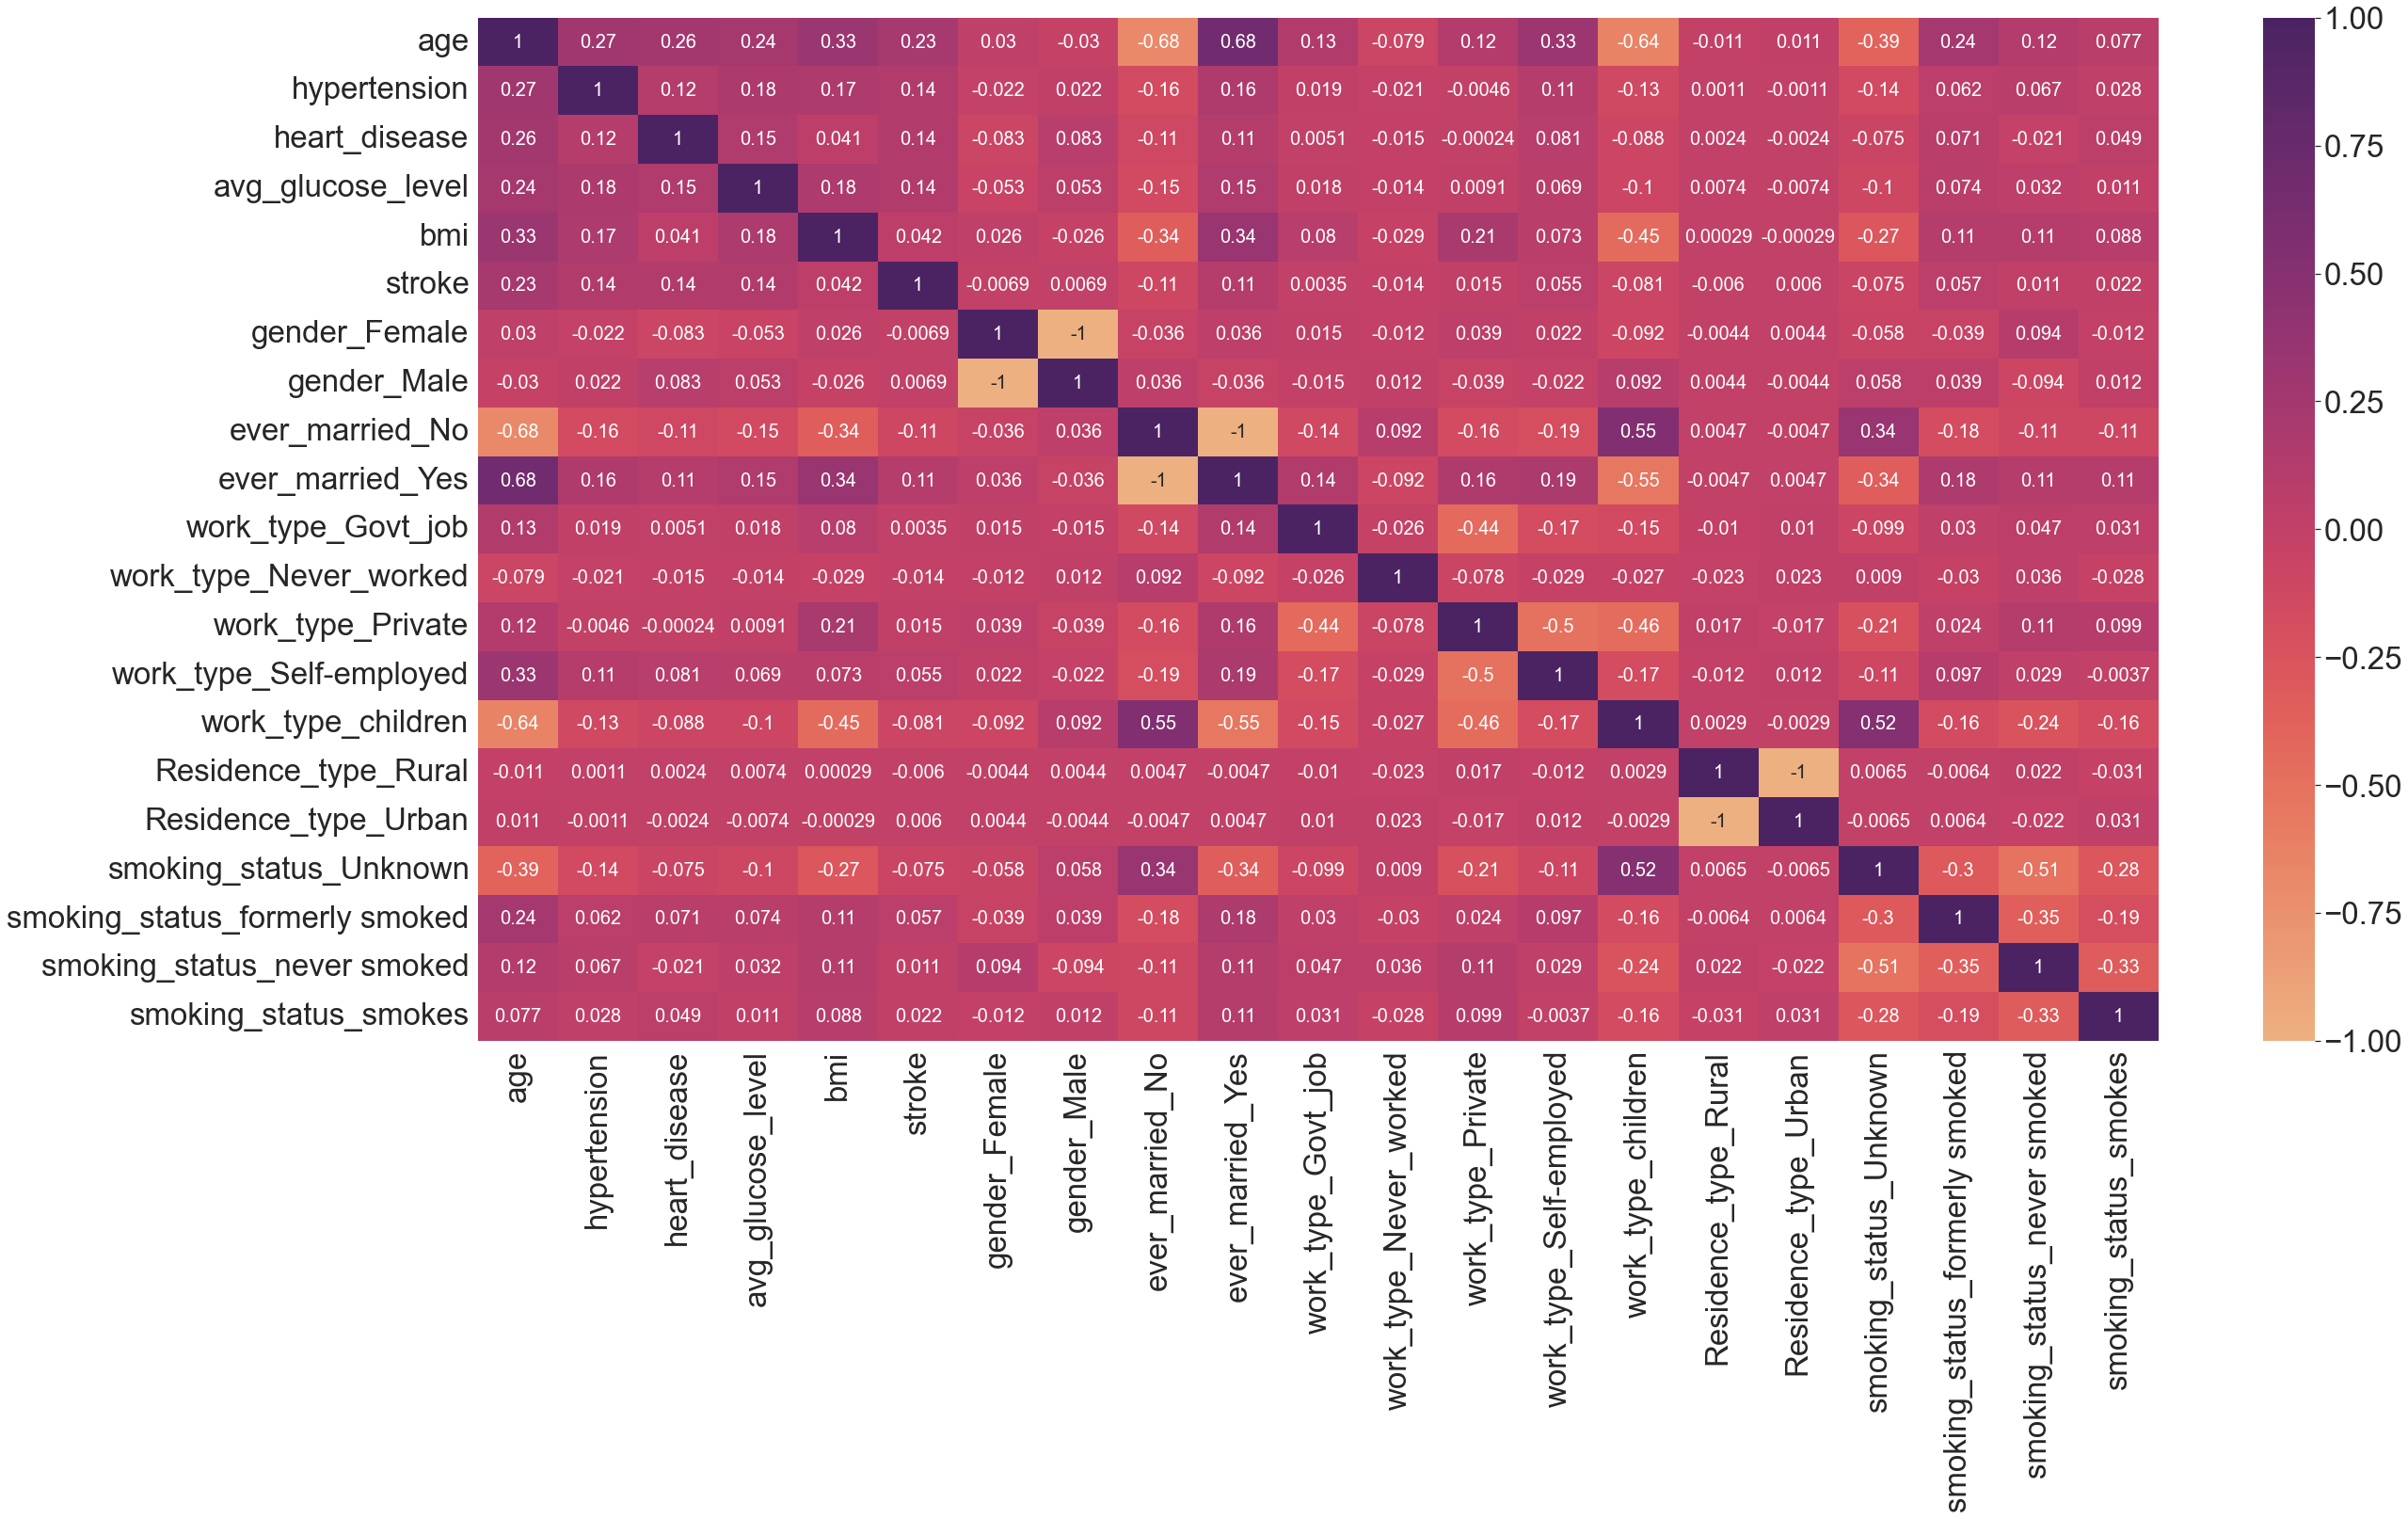

In [91]:
plt.figure(figsize=(40, 20))
sns.heatmap(heathdata_df.corr(), annot=True,cmap='flare', annot_kws={"size": 20} );
sns.set(font_scale=3) 

# Random Forsert Classifier 

In [96]:
X = heathdata_df [['age',                            
                   'hypertension',                         
                   'heart_disease',                      
                   'avg_glucose_level',                
                   'bmi',                                                            
                   'gender_Female',                      
                   'gender_Male',                         
                   'ever_married_No',                     
                   'ever_married_Yes',                   
                   'work_type_Govt_job',                  
                   'work_type_Never_worked',                
                   'work_type_Private',                
                   'work_type_Self-employed',             
                   'work_type_children',                  
                   'Residence_type_Rural',              
                   'Residence_type_Urban',                
                   'smoking_status_Unknown',              
                   'smoking_status_formerly smoked',       
                   'smoking_status_never smoked',         
                   'smoking_status_smokes',]]

y = heathdata_df['stroke']

In [97]:
print("Shape: ", X.shape, y.shape)

Shape:  (4908, 20) (4908,)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [99]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.955193482688391


we can see clearly that the sample is over sampled 

# Random Forest Feature Importance

# Features Selection 

In [102]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train_scaled, y_train)}')
print(f'model score on testing data: {model.score(X_test_scaled, y_test)}')

model score on training data: 0.0006224792235162147
model score on testing data: -0.03761681864235067


/Users/tamanikaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/tamanikaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [36]:
importances = model.feature_importances_

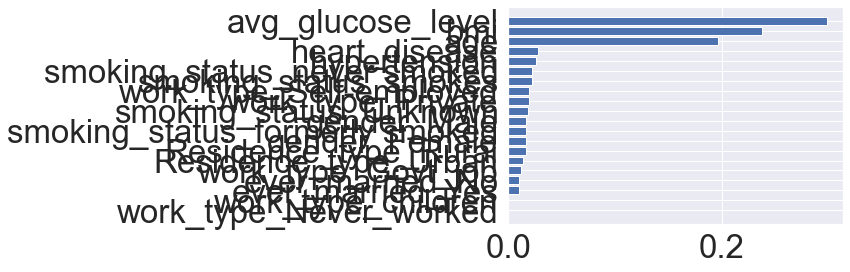

In [37]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [30]:
feature_importances = clf.feature_importances_ 

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

rnd_clf.fit(heathdata_df["data"], heathdata_df["target"])

for name, importance in zip(heathdata_df["feature_names"], rnd_clf.feature_importances_):
    print(name, "=", importance)

KeyError: 'data'

In [19]:
import numpy as np
 
feature_importances = clf.feature_importances_ 

# Sort the feature importance in descending order

sorted_indices = np.argsort(feature_importances)[::-1]
 
feat_labels = heathdata_df_1.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            feature_importances[sorted_indices[f]]))

NameError: name 'heathdata_df_1' is not defined

# Random Forsert Classifier with Features Selection 

In [ ]:
X_1 = heathdata_df_1 [['age',                            
                   'hypertension',                         
                   'heart_disease',                      
                   'avg_glucose_level',                
                   'bmi',                               
                    ]]

y_1 = heathdata_df_1['stroke']

print("Shape: ", X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=2)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled_1 = scaler.transform(X_train)
X_test_scaled_1 = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled_1, y_train)
print(f'Training Score: {clf.score(X_train_scaled_1, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled_1, y_test)}')

# GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create the param grid
param_grid = { 
    'n_estimators': [200, 5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       scoring='accuracy',
                       n_jobs=-1)

In [ ]:
rf_Grid.fit(X_train, y_train)

In [ ]:
rf_Grid.best_params_

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train)}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test)}')

In [ ]:
rfc1=RandomForestClassifier( 
                            n_estimators= 200, 
                            max_depth=4, 
                            criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for data: ",accuracy_score(y_test,pred))

In [ ]:
from sklearn.metrics import classification_report

print (classification_report (y_test,pred))

In [ ]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,pred)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM, annot=True,cmap='flare')
plt.show()

# Conclusion 